In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [13]:
# Load the dataset
data = pd.read_csv("day.csv")

# Display the first few rows and basic info
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  01-01-2018       1   0     1        0        6           0   
 1        2  02-01-2018       1   0     1        0        0           0   
 2        3  03-01-2018       1   0     1        0        1           1   
 3        4  04-01-2018       1   0     1        0        2           1   
 4        5  05-01-2018       1   0     1        0        3           1   
 
    weathersit       temp     atemp      hum  windspeed  casual  registered  \
 0           2  14.110847  18.18125  80.5833  10.749882     331         654   
 1           2  14.902598  17.68695  69.6087  16.652113     131         670   
 2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
 3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
 4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
 None

In [14]:
# Drop unnecessary columns
data = data.drop(['instant', 'dteday'], axis=1)

# Convert 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', and 'weathersit' to categorical types
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data[categorical_columns] = data[categorical_columns].astype('category')

# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Check data types and transformed dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   casual        730 non-null    int64  
 5   registered    730 non-null    int64  
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    bool   
 8   season_3      730 non-null    bool   
 9   season_4      730 non-null    bool   
 10  yr_1          730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,331,654,985,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,14.902598,17.68695,69.6087,16.652113,131,670,801,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,False,False,False,...,False,False,False,True,False,False,False,True,False,False


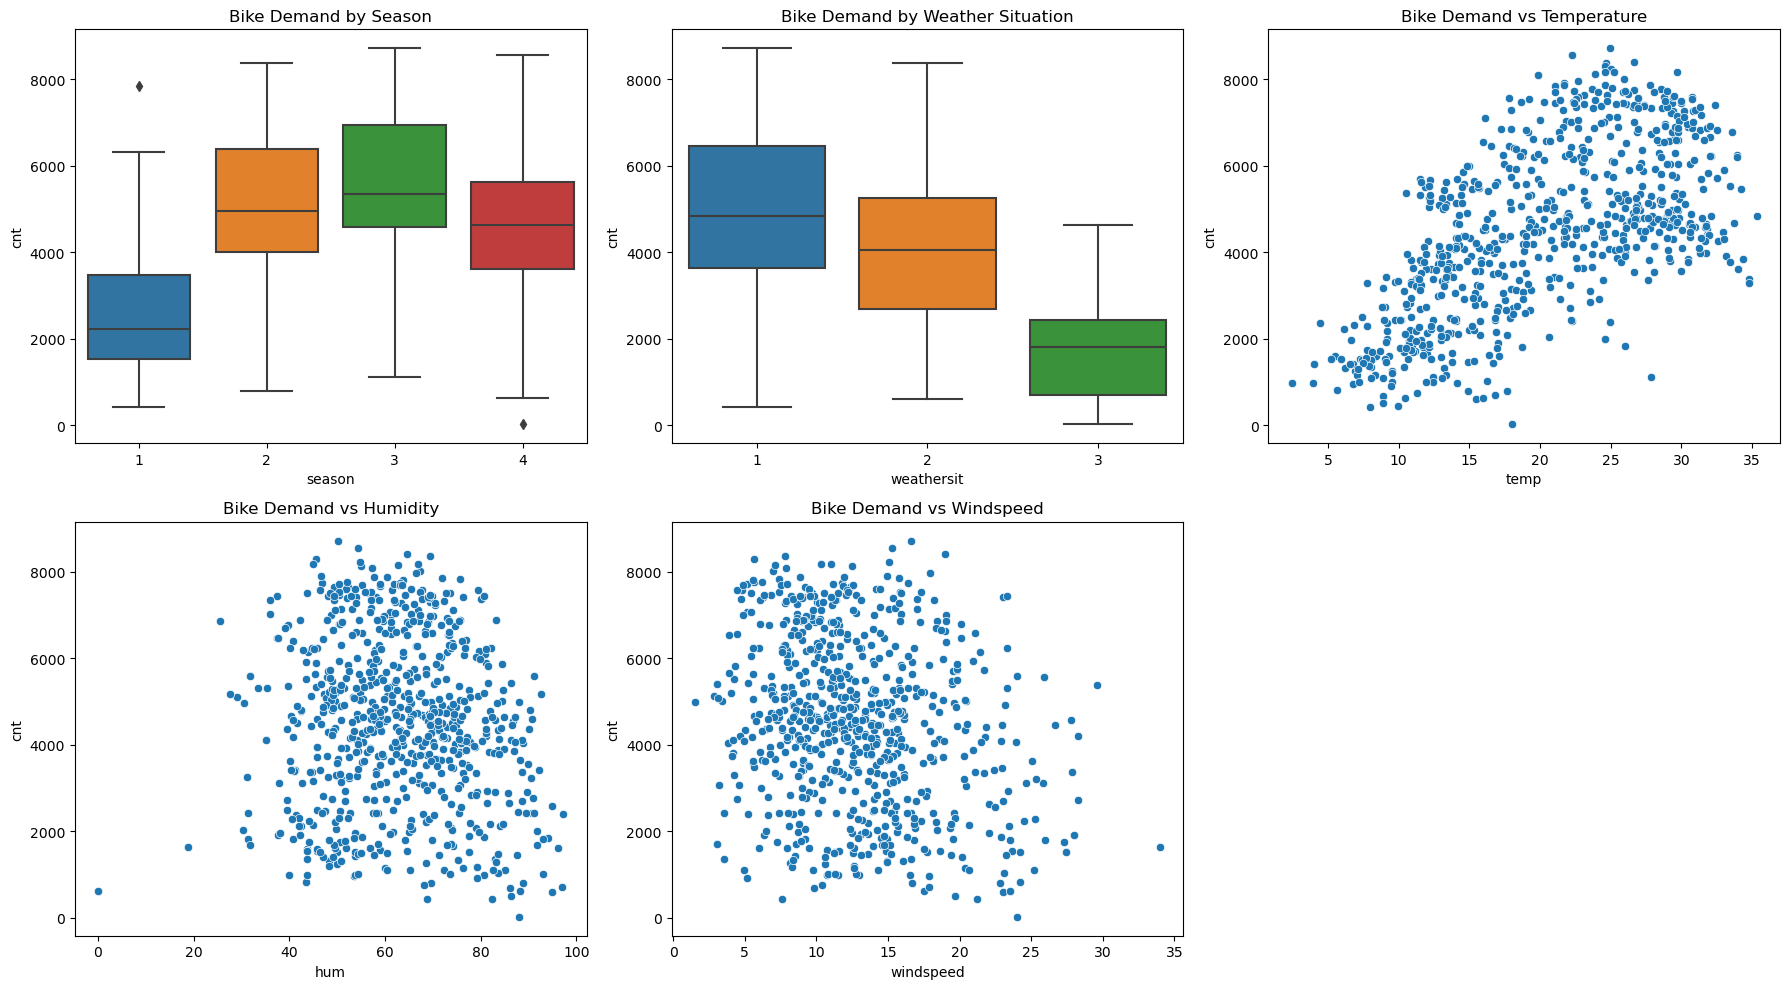

In [19]:
# Reload the original dataset to perform EDA without modifying categorical columns
data = pd.read_csv("day.csv")

# Drop unnecessary columns for EDA
data = data.drop(['instant', 'dteday'], axis=1)

# Plotting to understand the relationships between variables and target 'cnt'
plt.figure(figsize=(18, 10))

# Plot distribution of 'cnt' across different seasons
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=data)
plt.title('Bike Demand by Season')

# Plot distribution of 'cnt' across different weather situations
plt.subplot(2, 3, 2)
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Bike Demand by Weather Situation')

# Scatter plot to see the relationship between temperature and bike demand
plt.subplot(2, 3, 3)
sns.scatterplot(x='temp', y='cnt', data=data)
plt.title('Bike Demand vs Temperature')

# Scatter plot for humidity and demand
plt.subplot(2, 3, 4)
sns.scatterplot(x='hum', y='cnt', data=data)
plt.title('Bike Demand vs Humidity')

# Scatter plot for windspeed and demand
plt.subplot(2, 3, 5)
sns.scatterplot(x='windspeed', y='cnt', data=data)
plt.title('Bike Demand vs Windspeed')

plt.tight_layout()
plt.show()


In [20]:
# Define feature matrix X and target variable y
X = data.drop(['cnt', 'casual', 'registered'], axis=1)
y = data['cnt']

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"R-squared score on test set: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared score on test set: 0.8355422116950033
Mean Absolute Error (MAE): 570.7139049879678
Mean Squared Error (MSE): 562913.0197910969
Root Mean Squared Error (RMSE): 750.2752960021387


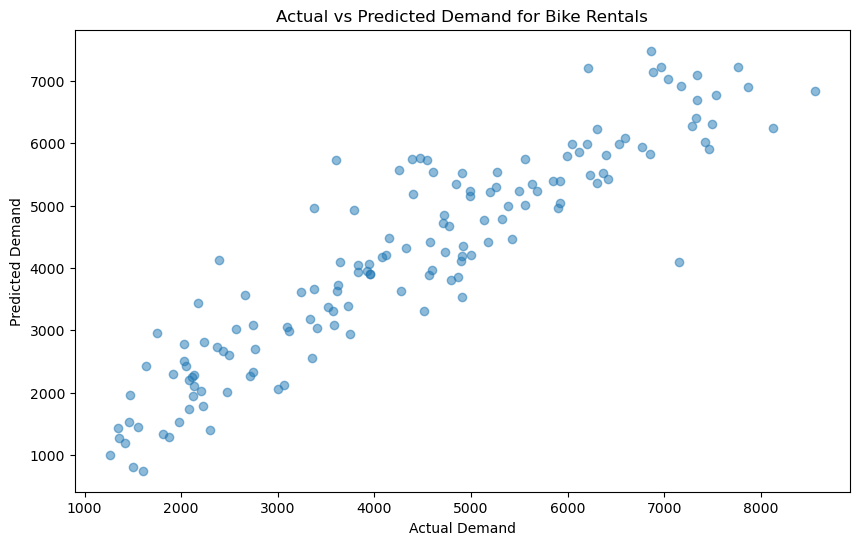

In [23]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand for Bike Rentals")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


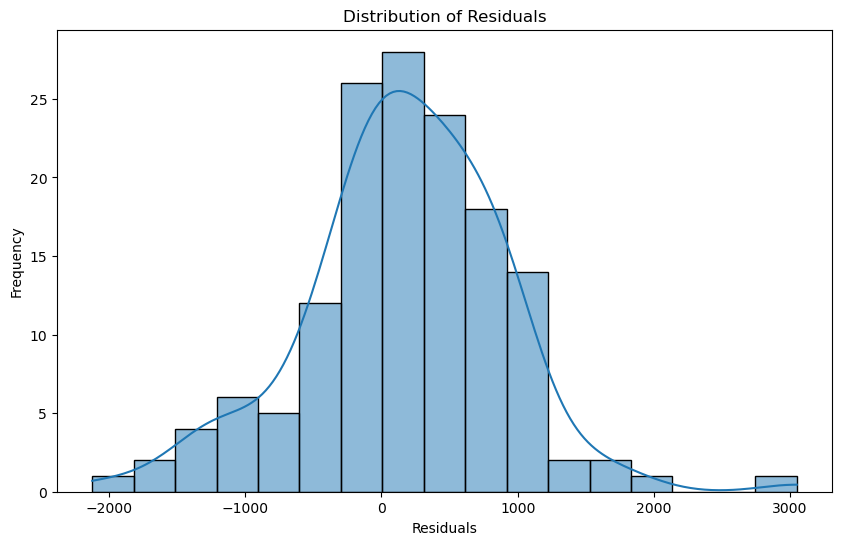

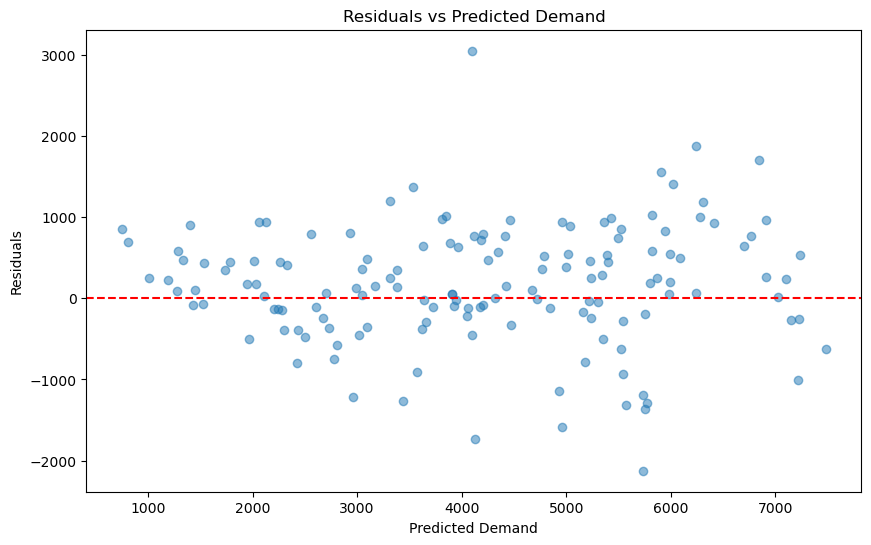

In [24]:
# Residual Analysis: Plot residuals to check for any patterns
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Demand")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Demand")
plt.show()
